In [1]:
import sys
if "../" not in sys.path:
  sys.path.append("../")

from sklearn.datasets import make_regression

from dataset.synthetic import make_wave
from supervised.linear_regression import LinearRegressionGD, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_wave(n_samples=1000)

In [3]:
model_gd = LinearRegressionGD(lr=0.001, max_iters=2000, verbose=False)
%time model_gd.fit(X, y)

CPU times: user 136 ms, sys: 3.2 ms, total: 139 ms
Wall time: 139 ms


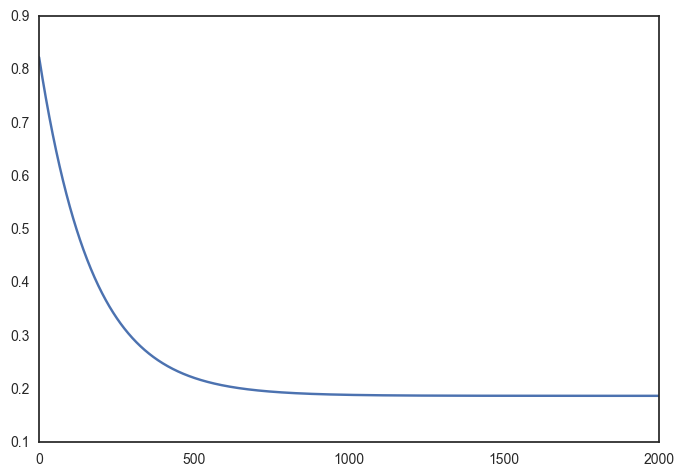

In [4]:
plt.plot(model_gd.loss_history)

In [5]:
# Compare with (closed form) LinearRegression
model = LinearRegression()
%time model.fit(X, y)

CPU times: user 1.43 ms, sys: 987 µs, total: 2.42 ms
Wall time: 6.88 ms


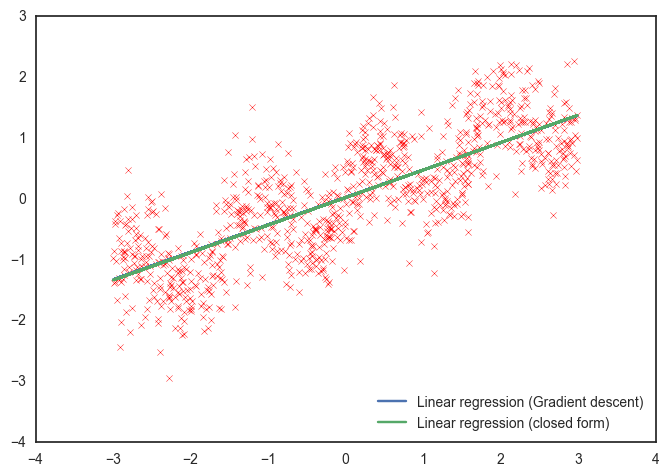

In [6]:
plt.scatter(X, y, c='r', marker='x')
plt.plot(X, model_gd.predict(X), label='Linear regression (Gradient descent)')
plt.plot(X, model.predict(X), label='Linear regression (closed form)')
plt.legend(loc=4);